In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [3]:
connection = create_server_connection("localhost", "root", "259604")

MySQL Database connection successful


In [4]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [5]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [6]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [7]:
dadosEstudantes = []
colunas = ["Matrículas", "Status", "Estudante", "Disciplina"]

In [8]:
q1 = """
select distinct Matriculas, Status, IDEstudante, IDDisciplina from(
	select distinct * from student_data.dados 
	inner join student_data.fluxos on
	student_data.dados.IDFluxo =  student_data.fluxos.Fluxo where Abrev = "AEROESPACIAL") igualarFluxo;
"""

connection = create_db_connection("localhost", "root", "259604", "student_data")
results = read_query(connection, q1)

for result in results:
  dadosEstudantes.append(result)

MySQL Database connection successful


In [9]:
df = pd.DataFrame(dadosEstudantes, columns = colunas)

df.head()

,Matrículas,Status,Estudante,Disciplina
0,1,1,27990,ENM0068
1,1,1,27990,ENM0071
2,1,1,27990,FGA0008
3,1,1,27990,FGA0021
4,1,1,27990,FGA0037


In [10]:
df.dtypes

Matrículas     int64
Status         int64
Estudante      int64
Disciplina    object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15075 entries, 0 to 15074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Matrículas  15075 non-null  int64 
 1   Status      15075 non-null  int64 
 2   Estudante   15075 non-null  int64 
 3   Disciplina  15075 non-null  object
dtypes: int64(3), object(1)
memory usage: 471.2+ KB


In [12]:
df['Status'].unique()

array([1, 2, 5], dtype=int64)

In [13]:
X = df.drop(['Status'], axis=1).copy()
X.head()

,Matrículas,Estudante,Disciplina
0,1,27990,ENM0068
1,1,27990,ENM0071
2,1,27990,FGA0008
3,1,27990,FGA0021
4,1,27990,FGA0037


In [14]:
y = df['Status'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [15]:
X_encoded = pd.get_dummies(X, columns=['Disciplina'])
X_encoded.head()

,Matrículas,Estudante,Disciplina_ADM0023,Disciplina_ADM0092,Disciplina_CIC0004,Disciplina_CIC0007,Disciplina_CIC0088,Disciplina_CIC0090,Disciplina_CIC0197,Disciplina_DEG0204,...,Disciplina_MAT0025,Disciplina_MAT0026,Disciplina_MAT0027,Disciplina_MAT0030,Disciplina_MAT0031,Disciplina_MAT0038,Disciplina_MAT0048,Disciplina_MAT0053,Disciplina_MAT0059,Disciplina_MAT0137
0,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y.unique()

array([1, 2, 5], dtype=int64)

In [17]:
len(X_encoded)

15075

In [18]:
len(y)

15075

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5936232251521298, 0.9772727272727273, 'Estudante <= 24347.5\ngini = 0.496\nsamples = 11306\nvalue = [2147, 7569, 1590]\nclass = Matrículado'),
 Text(0.31047160243407707, 0.9318181818181818, 'Estudante <= 14121.5\ngini = 0.29\nsamples = 8096\nvalue = [392, 6742, 962]\nclass = Matrículado'),
 Text(0.09102434077079108, 0.8863636363636364, 'Estudante <= 4727.5\ngini = 0.107\nsamples = 3452\nvalue = [0, 3256, 196]\nclass = Matrículado'),
 Text(0.032454361054766734, 0.8409090909090909, 'Estudante <= 4682.5\ngini = 0.038\nsamples = 919\nvalue = [0, 901, 18]\nclass = Matrículado'),
 Text(0.016227180527383367, 0.7954545454545454, 'Estudante <= 4681.5\ngini = 0.278\nsamples = 66\nvalue = [0, 55, 11]\nclass = Matrículado'),
 Text(0.008113590263691683, 0.75, 'gini = 0.0\nsamples = 55\nvalue = [0, 55, 0]\nclass = Matrículado'),
 Text(0.02434077079107505, 0.75, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]\nclass = Evadido'),
 Text(0.0486815415821501, 0.7954545454545454, 'Estudante <= 4712.5

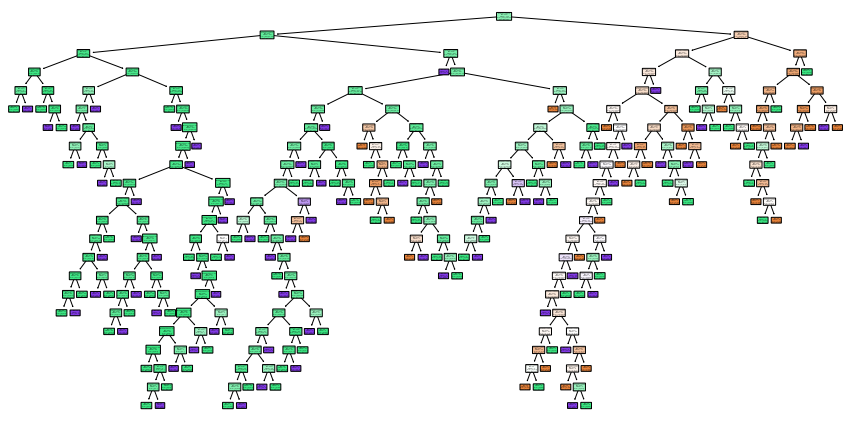

In [20]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True,
        class_names=["Formado", "Matrículado", "Evadido"],
        feature_names=X_encoded.columns)

c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


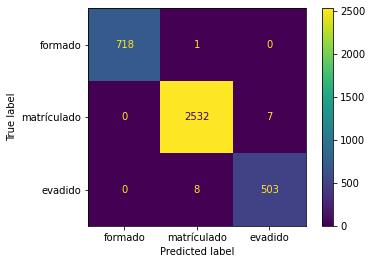

In [21]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels =["formado", "matrículado", "evadido"])

<AxesSubplot:xlabel='tree'>

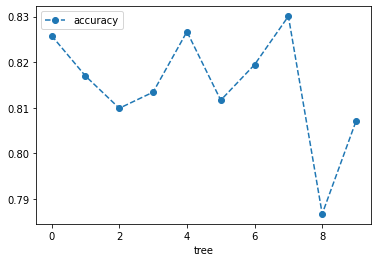

In [22]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.004)
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [23]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

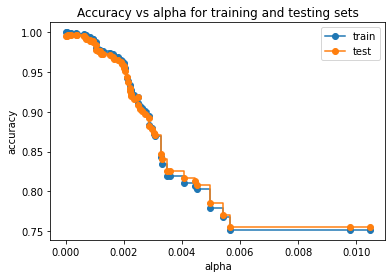

In [24]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label ="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='alpha'>

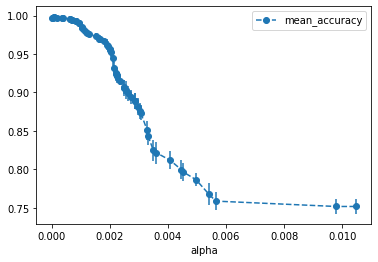

In [25]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                    y='mean_accuracy',
                    yerr='std',
                    marker='o',
                    linestyle='--')

In [26]:
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           1       0.55      0.83      0.66       719
           2       0.84      0.89      0.86      2539
           5       0.00      0.00      0.00       511

    accuracy                           0.76      3769
   macro avg       0.46      0.57      0.51      3769
weighted avg       0.67      0.76      0.71      3769



c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,